In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
# Importing the dataset
dataset = pd.read_csv('ObesityDataSet.csv')

In [4]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
dataset.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

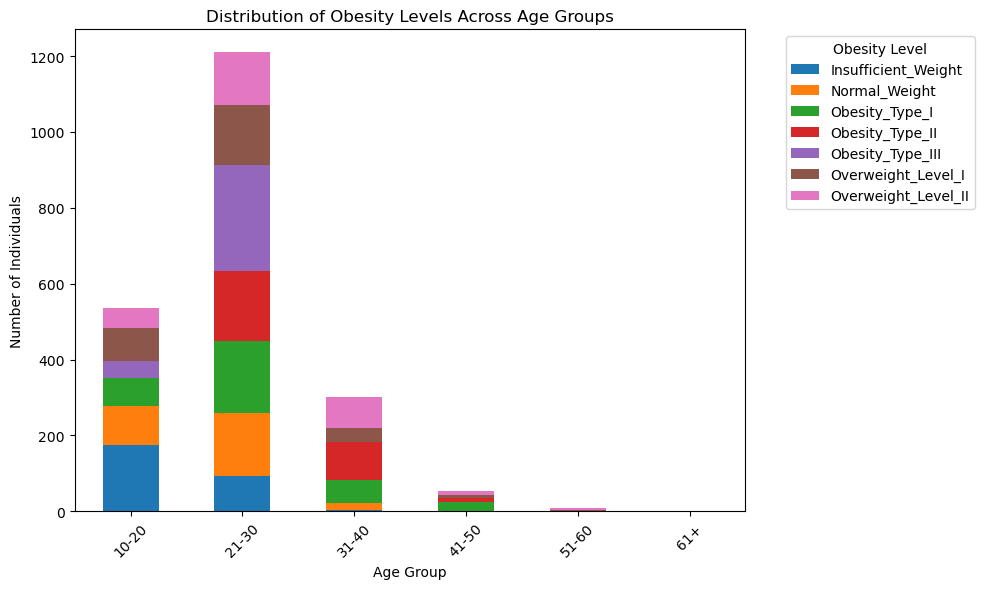

In [7]:
# Visualising the distribution of obesity levels across different age groups
# Defining age groups
age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorizing individuals into age groups
dataset['Age Group'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate distribution of obesity levels within each age group
obesity_distribution = dataset.groupby(['Age Group', 'NObeyesdad']).size().unstack(fill_value=0)

# Plotting
obesity_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Obesity Levels Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

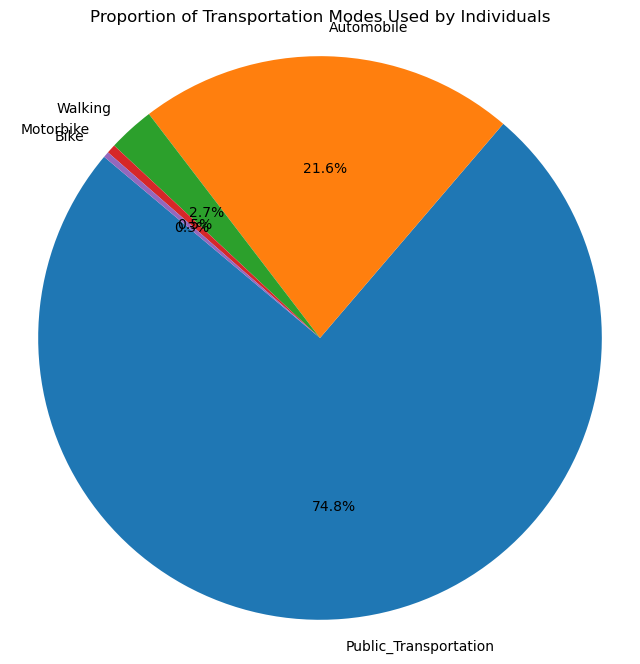

In [8]:
# Displaying the proportion of different transportation modes used by the individuals
# Calculating the proportion of each transportation mode
transportation_proportion = dataset['MTRANS'].value_counts(normalize=True)

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(transportation_proportion, labels=transportation_proportion.index, autopct='%1.1f%%', startangle=140)

# Adding chart title
plt.title('Proportion of Transportation Modes Used by Individuals')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Showing the plot
plt.show()

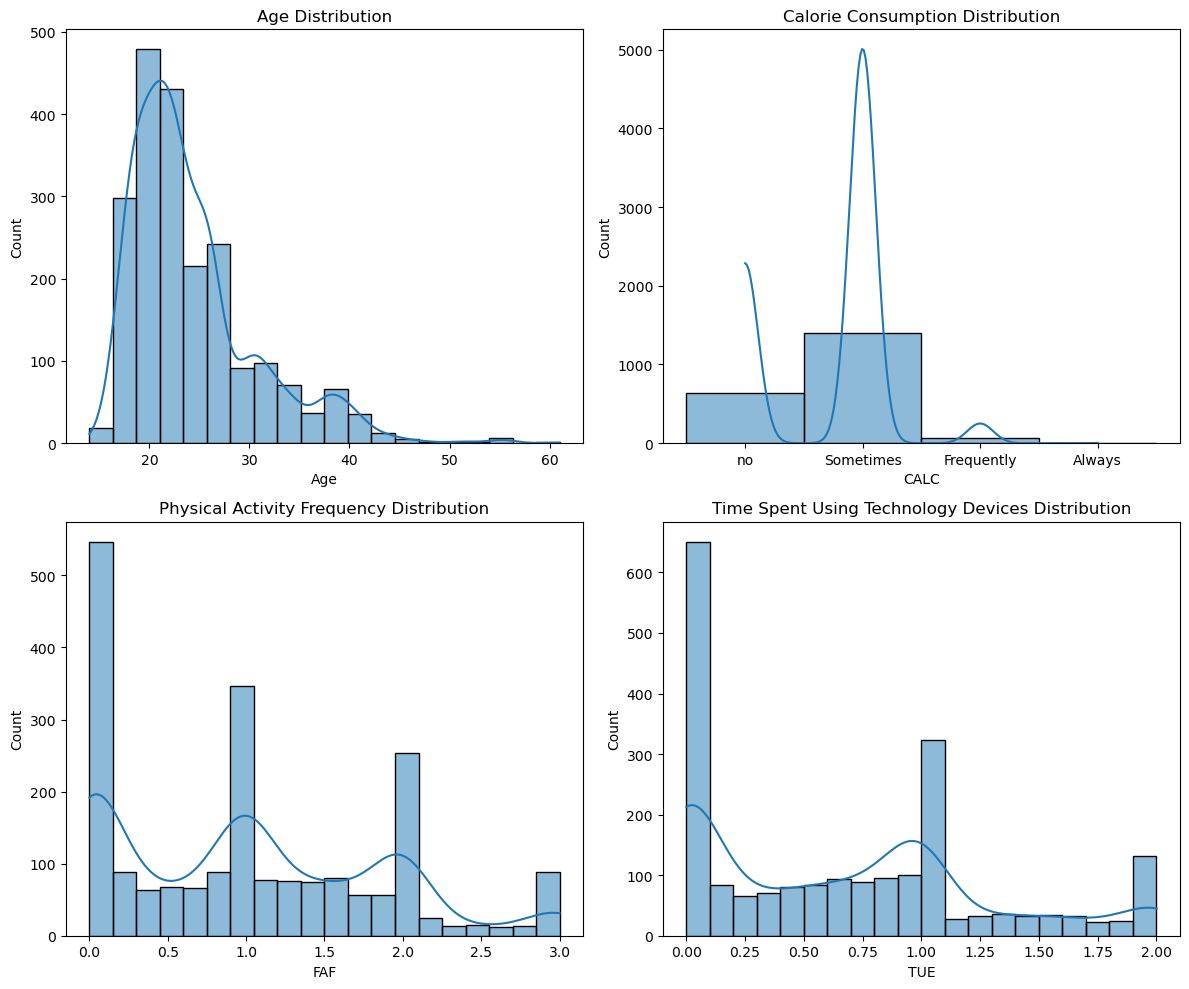

In [9]:
# Visualising the distribution of variables - age, calorie consumption, physical activity frequency and time spent on technology devices
# Setting up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting histograms for each attribute
sns.histplot(dataset['Age'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

sns.histplot(dataset['CALC'], bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Calorie Consumption Distribution')

sns.histplot(dataset['FAF'], bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Physical Activity Frequency Distribution')

sns.histplot(dataset['TUE'], bins=20, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Time Spent Using Technology Devices Distribution')

# Adjusting layout
plt.tight_layout()

# Showing the plots
plt.show()

In [10]:
dataset = dataset.drop(['Age Group'], axis=1)

In [11]:
# Converting categorical variables to numerical variables
dataset['Gender'] = dataset['Gender'].replace({'Male': 0, 'Female': 1})
dataset['family_history_with_overweight'] = dataset['family_history_with_overweight'].replace({'no': 0, 'yes': 1})
dataset['FAVC'] = dataset['FAVC'].replace({'no': 0, 'yes': 1})
dataset['CAEC'] = dataset['CAEC'].replace({'no' : 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
dataset['SMOKE'] = dataset['SMOKE'].replace({'no': 0, 'yes': 1})
dataset['SCC'] = dataset['SCC'].replace({'no': 0, 'yes': 1})
dataset['CALC'] = dataset['CALC'].replace({'no' : 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
dataset['MTRANS'] = dataset['MTRANS'].replace({'Walking' : 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Automobile': 4})
dataset['NObeyesdad'] = dataset['NObeyesdad'].replace({'Insufficient_Weight' : 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})
print(dataset)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0          1  21.000000  1.620000   64.000000                               1   
1          1  21.000000  1.520000   56.000000                               1   
2          0  23.000000  1.800000   77.000000                               1   
3          0  27.000000  1.800000   87.000000                               0   
4          0  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       1  20.976842  1.710730  131.408528                               1   
2107       1  21.982942  1.748584  133.742943                               1   
2108       1  22.524036  1.752206  133.689352                               1   
2109       1  24.361936  1.739450  133.346641                               1   
2110       1  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [13]:
dataset.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.125059,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.676969,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,3.000000,1.000000
50%,0.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


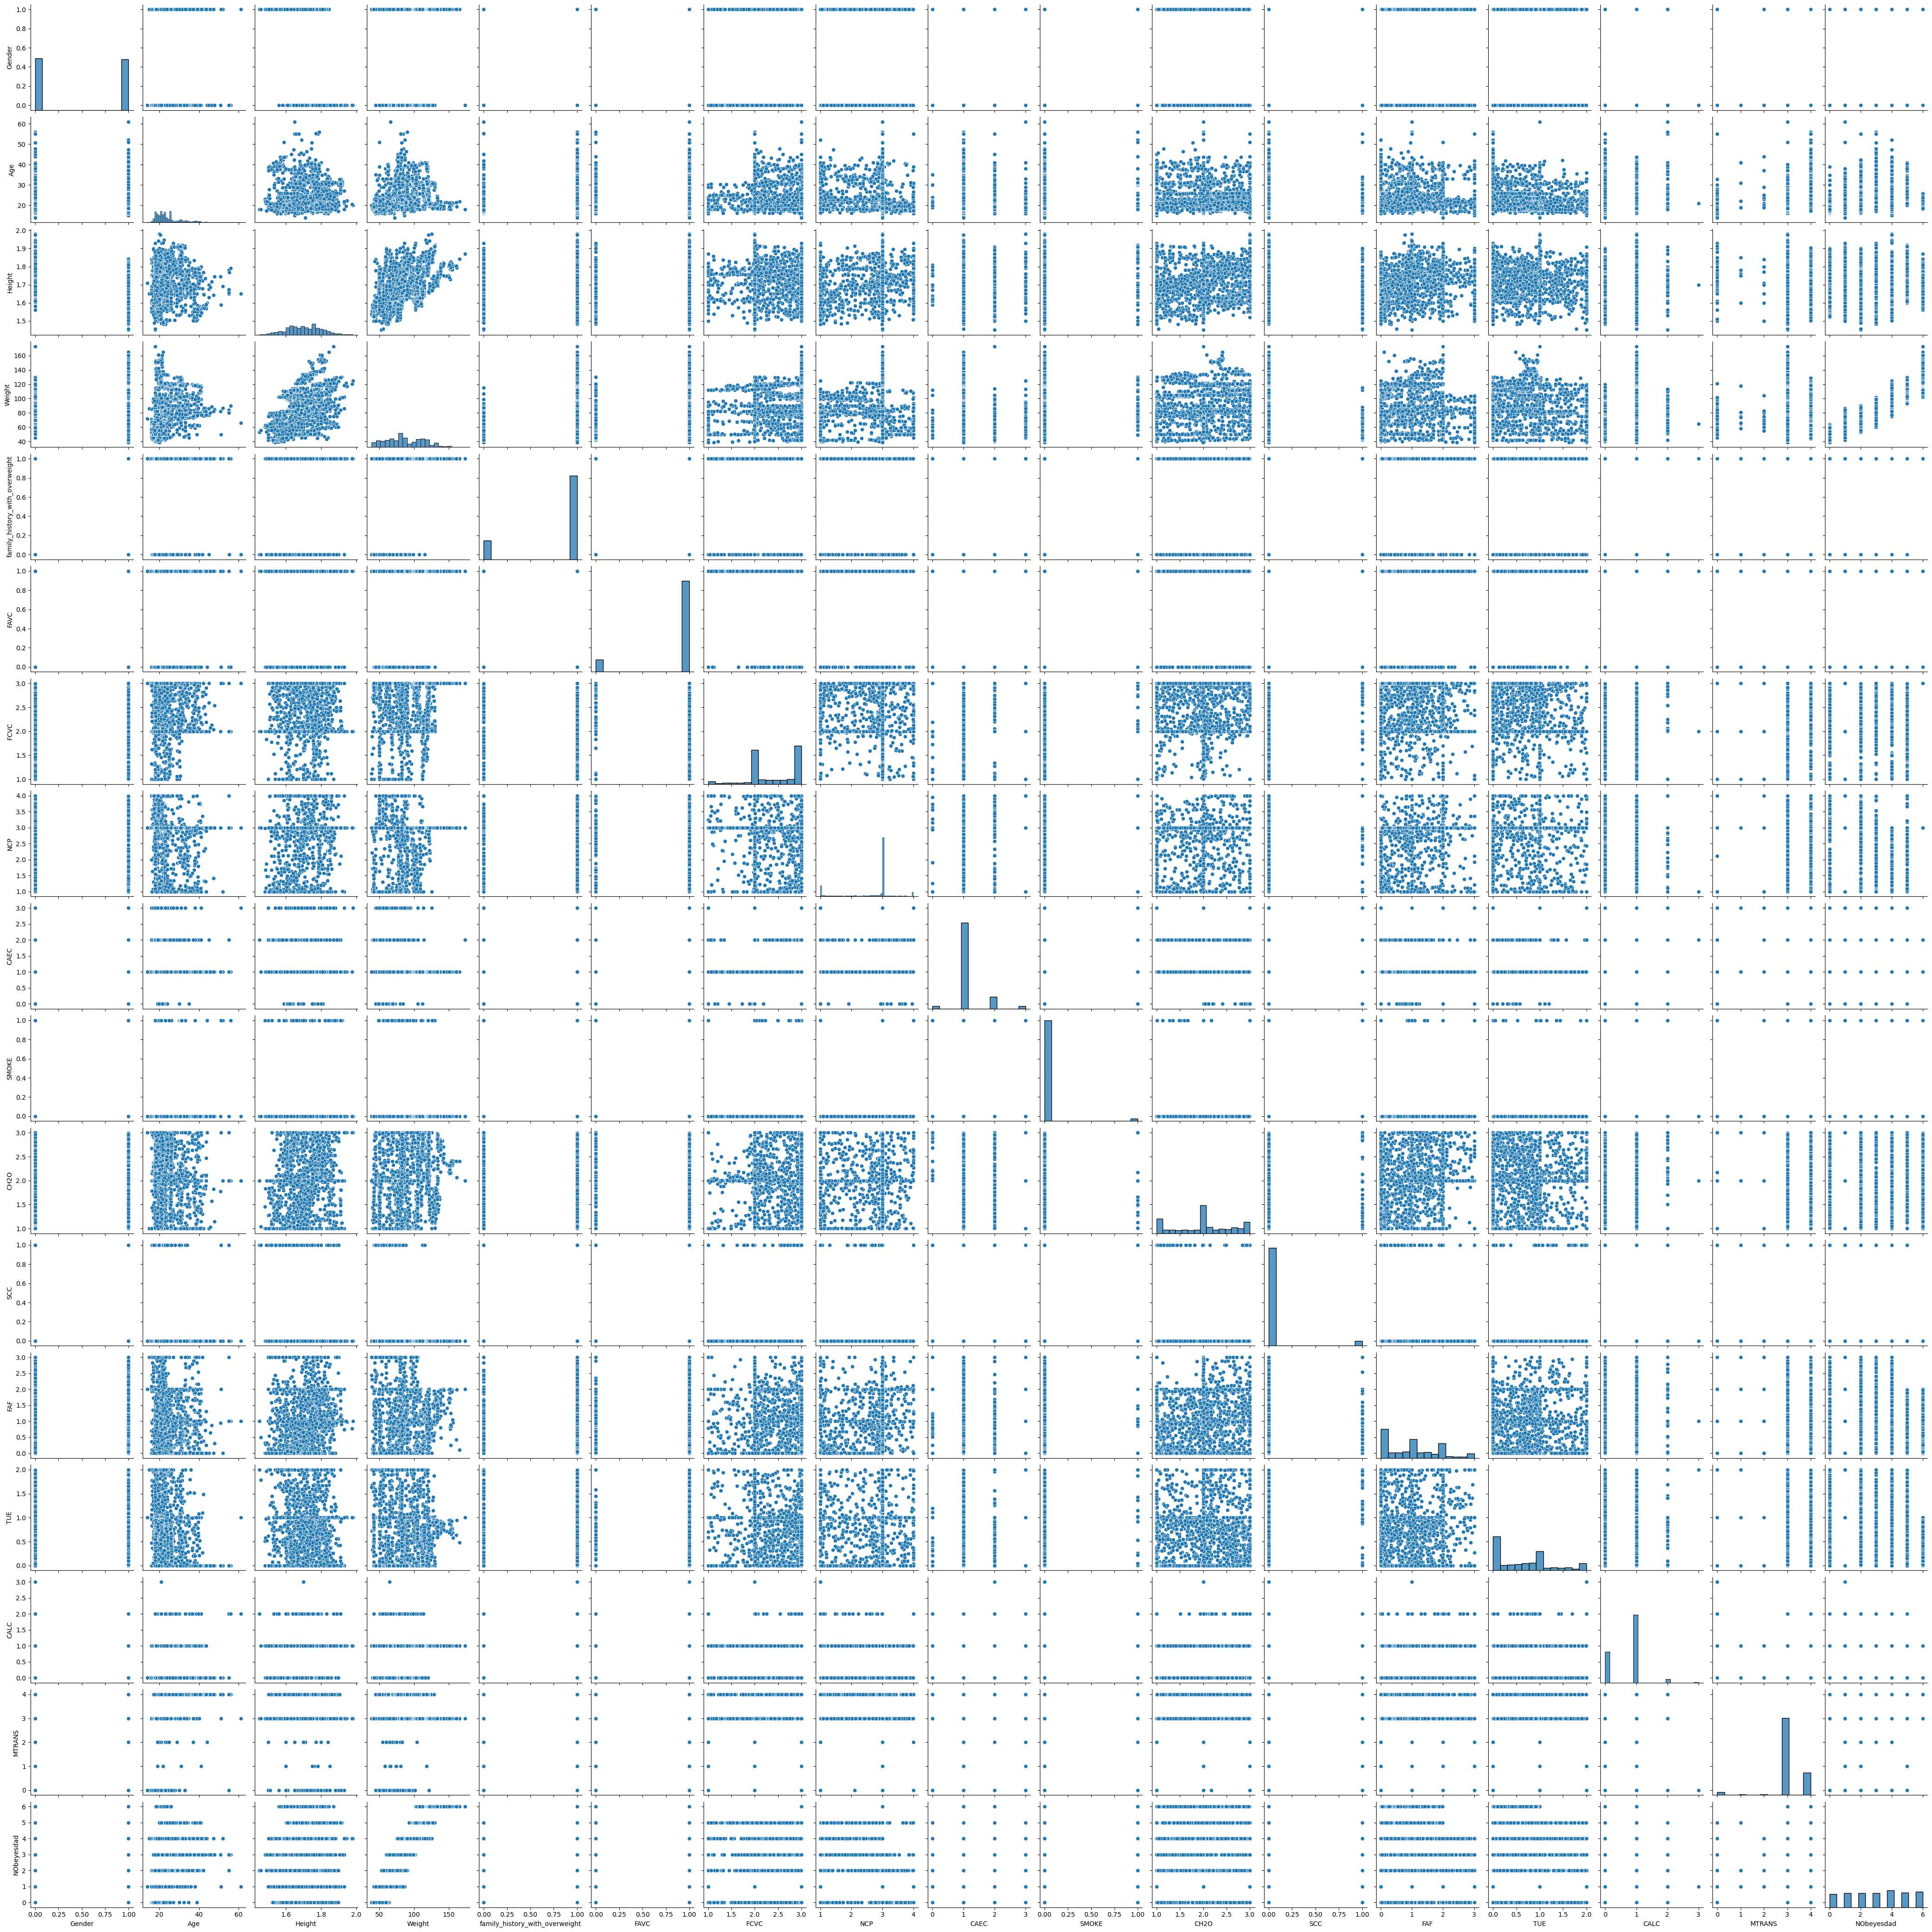

In [14]:
sns.pairplot(dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]])

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

C:\Users\TOLUWALOPE OJUROYE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TOLUWALOPE OJUROYE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TOLUWALOPE OJUROYE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TOLUWALOPE OJUROYE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

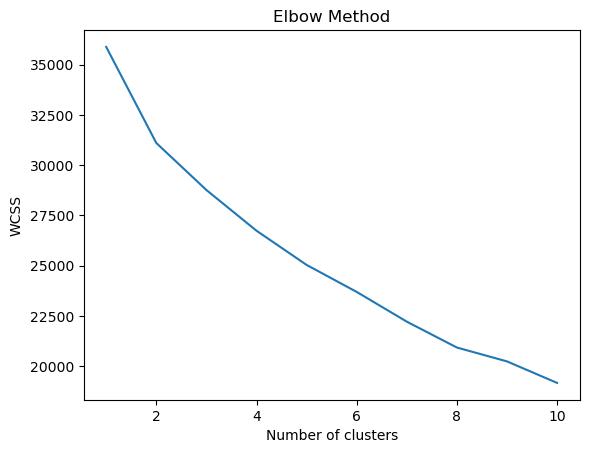

In [17]:
# Using the Elbow method to find the optimal K value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataset_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [18]:
# Choosing the optimal K value and fitting the KMeans model
k_optimal = 2  # Chosen from the Elbow method
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
dataset['Cluster_KMeans'] = kmeans.fit_predict(dataset_scaled)

C:\Users\TOLUWALOPE OJUROYE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
# Reducing dimensionality before visualisation

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dataset_scaled_reduced = pca.fit_transform(dataset_scaled)

pca.explained_variance_ratio_

array([0.18488289, 0.11693429])

In [20]:
sum(pca.explained_variance_ratio_)

0.3018171850026201

<function matplotlib.pyplot.show(close=None, block=None)>

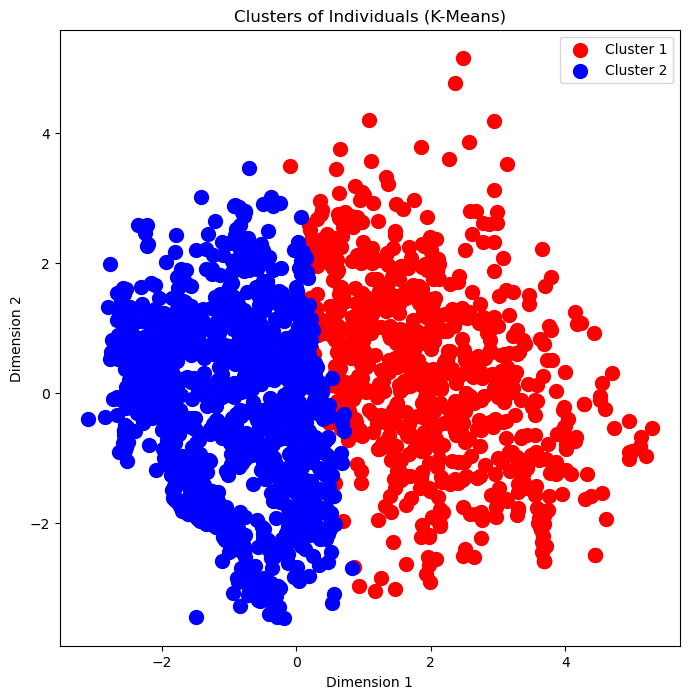

In [21]:
# Visualising the clusters

colours = ['red', 'blue']

plt.figure(figsize=(8,8))
for i in range(2):
    plt.scatter(dataset_scaled_reduced[dataset['Cluster_KMeans'] == i, 0], dataset_scaled_reduced[dataset['Cluster_KMeans'] == i, 1],
                s = 100, c = colours[i] , label = 'Cluster '+str(i+1))
plt.title('Clusters of Individuals (K-Means)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

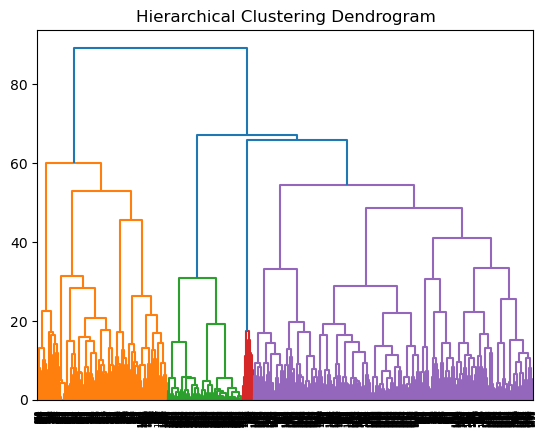

In [24]:
# Creating a linkage matrix using Ward's method
linkage_matrix = linkage(dataset_scaled, method='ward')

# Plotting the dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [25]:
# Fitting Hierarchical Clustering to the dataset

hc_optimal = 7  # Chosen from the dendrogram

hierarchical = AgglomerativeClustering(n_clusters=hc_optimal, affinity='euclidean', linkage='ward')

dataset['Cluster_Hierarchical'] = hierarchical.fit_predict(dataset_scaled)

C:\Users\TOLUWALOPE OJUROYE\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

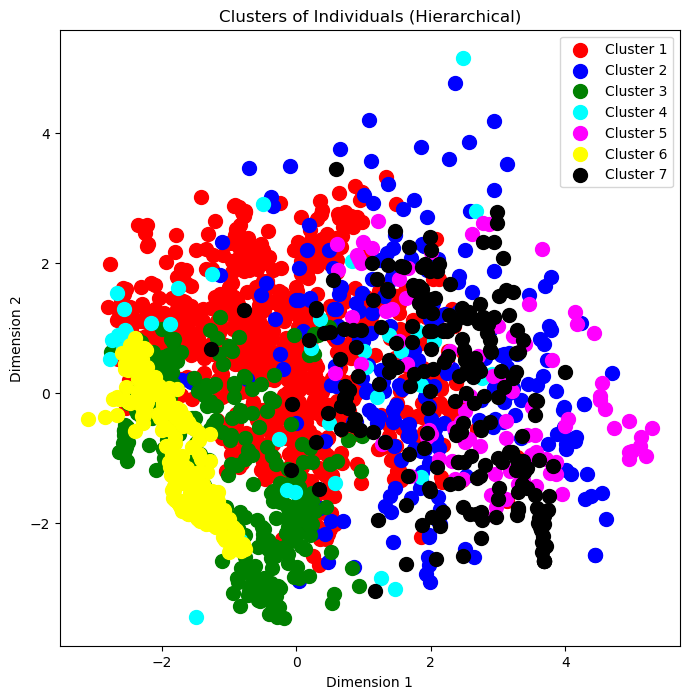

In [26]:
# Visualising the clusters

colours = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black']

plt.figure(figsize=(8,8))
for i in range(7):
    plt.scatter(dataset_scaled_reduced[dataset['Cluster_Hierarchical'] == i, 0], dataset_scaled_reduced[dataset['Cluster_Hierarchical'] == i, 1],
                s = 100, c = colours[i] , label = 'Cluster '+str(i+1))
plt.title('Clusters of Individuals (Hierarchical)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show